## Render claws in obj2d.s

In [1]:
def getFaceData(face_data, verts):
    faces_string = face_data
    faces = [x.strip() for x in faces_string.split('\n') if x.strip()][:-1]
    faces = [x.split('\t')[0].split(' ')[1] for x in faces]
    no_faces = int(faces[0])
    faces = (faces[1]+','+faces[2]).split(',')

    pairs_string = verts
    pairs = [int(x) for x in pairs_string.split()[1].split(',')]

    vertices = []
    intensities = []
    colors = []
    for i in range(0,len(faces),8):
        color = faces[i]
        colors += [color]

        index1 = int(faces[i+1])
        index2 = int(faces[i+3])
        index3 = int(faces[i+5])
        vertex1 = tuple(pairs[index1*2:(index1*2)+2])
        vertex2 = tuple(pairs[index2*2:(index2*2)+2])
        vertex3 = tuple(pairs[index3*2:(index3*2)+2])
        vertices += [[vertex1,vertex2,vertex3]]

        intensity1 = faces[i+2]
        intensity2 = faces[i+4]
        intensity3 = faces[i+6]
        intensities += [(intensity1,intensity2,intensity3)]
    return (no_faces, colors, intensities, vertices)


Had to clean up `obj2d.s` a bit. The claws are split out into a separate file.

In [8]:
data = open("claws.s").read().split(":")[1:]

poly_data = []
for i in range(0,len(data),2):
    poly_data += [getFaceData(data[i],data[i+1])]
len(poly_data)

16

In [3]:
flatten = lambda l: [e for sublist in l for e in sublist]

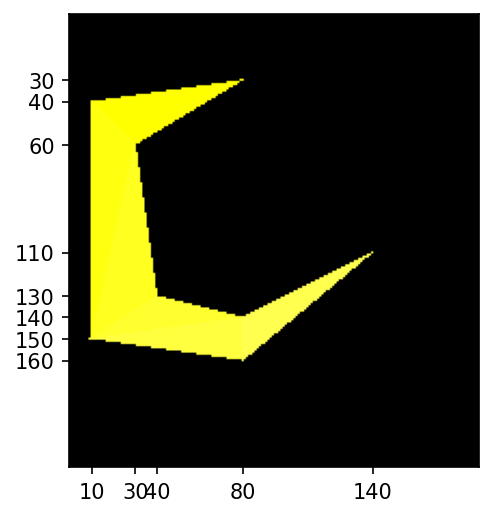

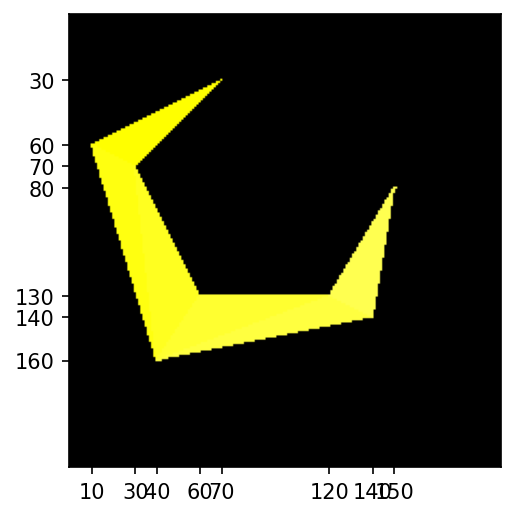

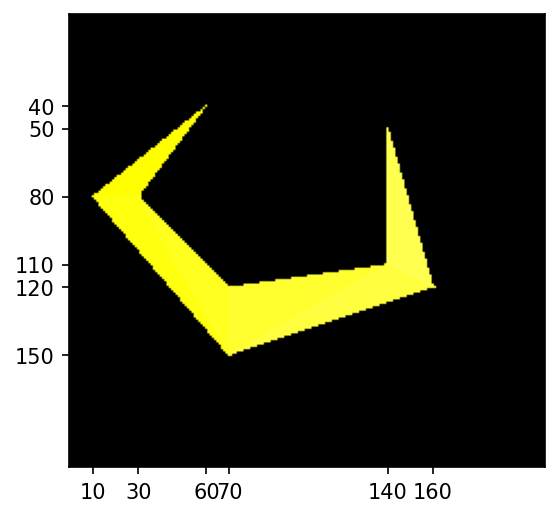

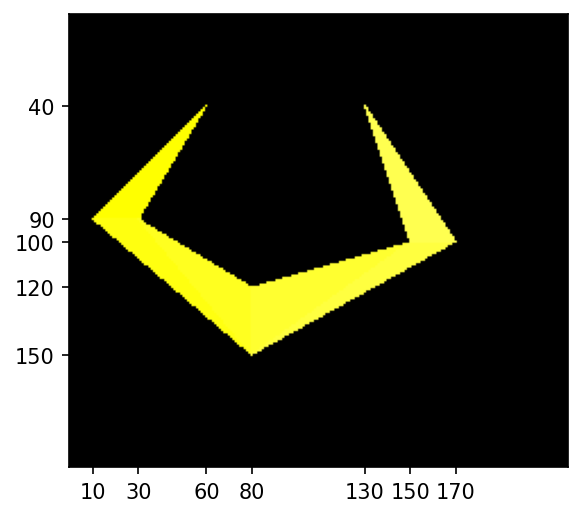

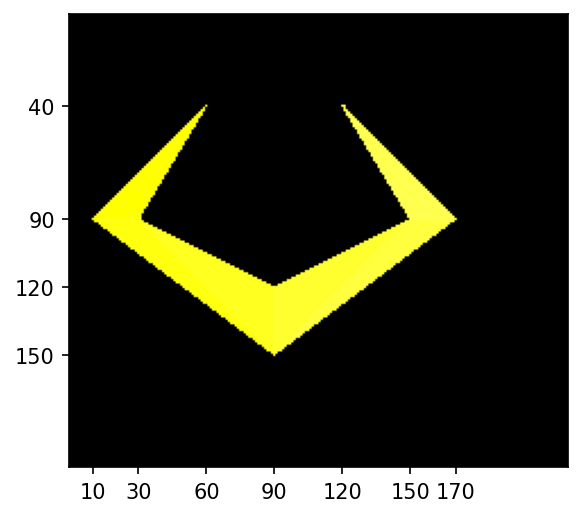

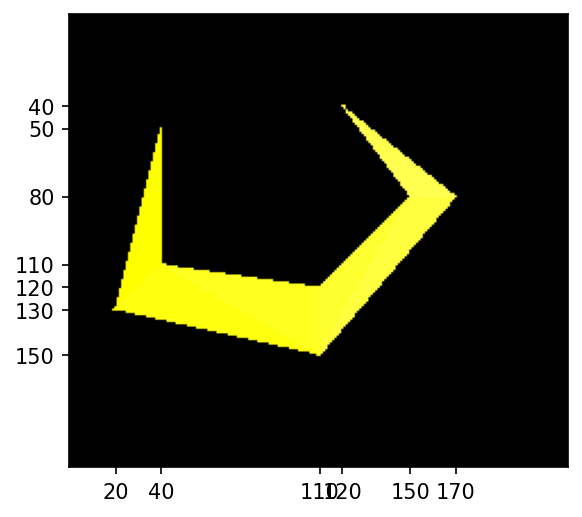

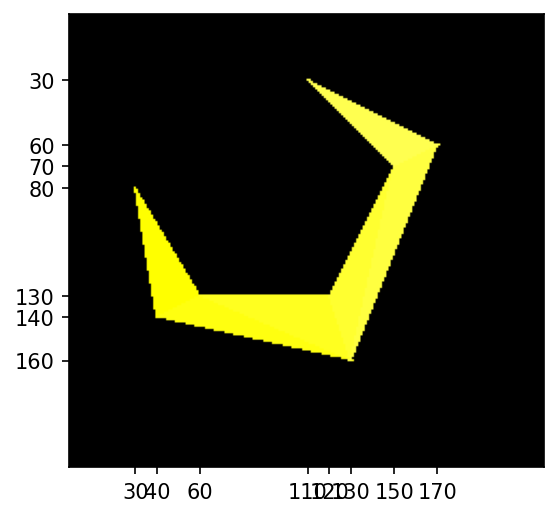

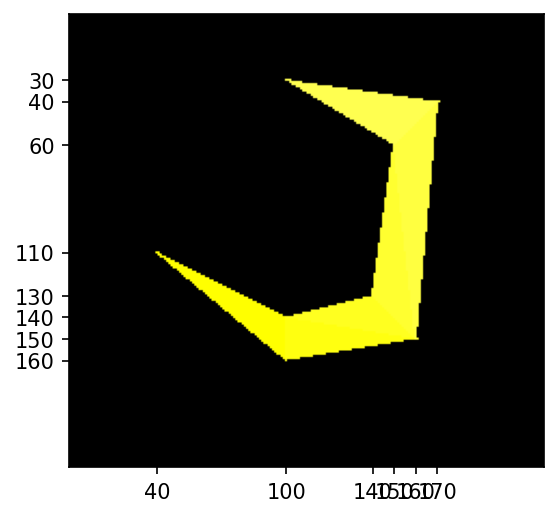

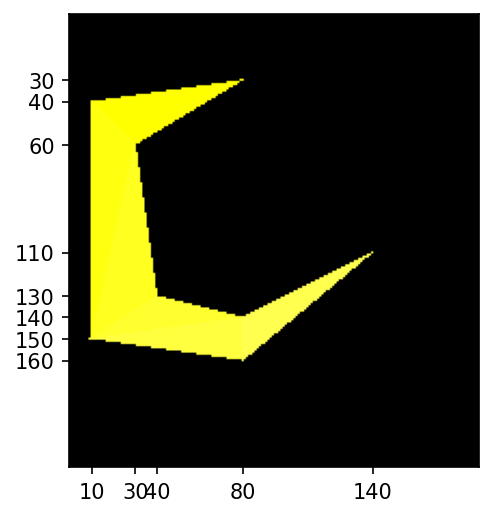

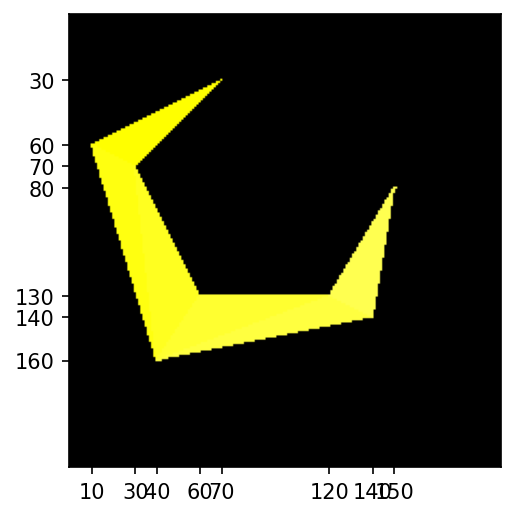

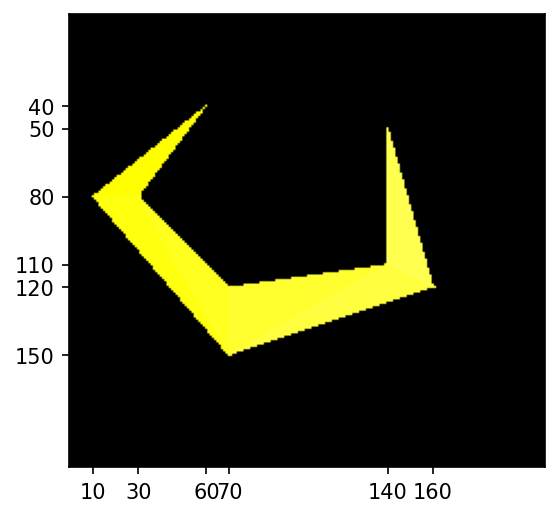

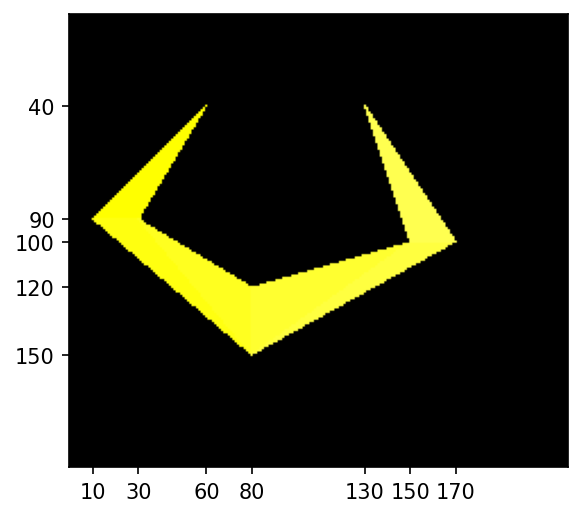

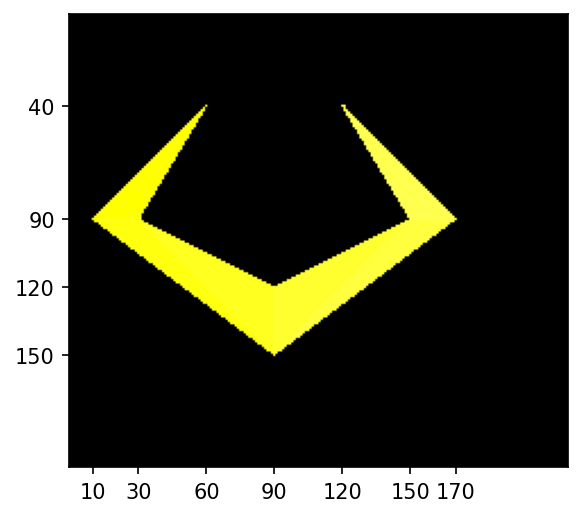

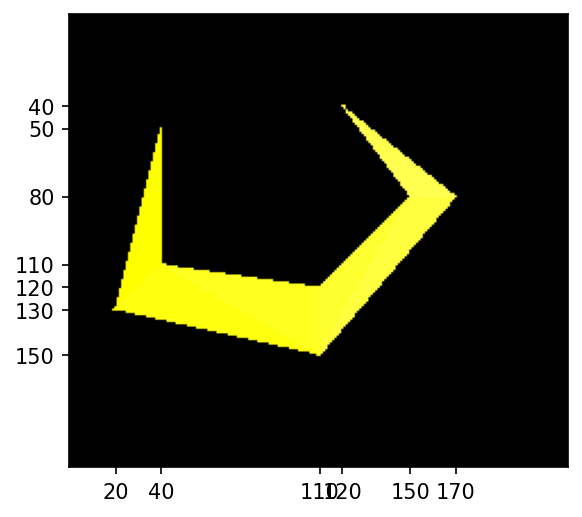

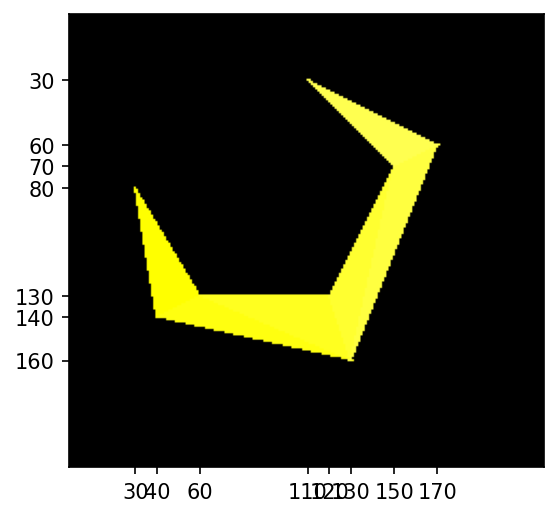

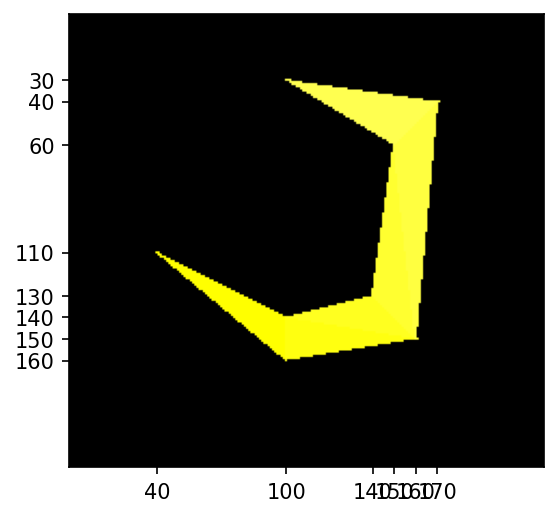

In [11]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.dpi'] = 150

for claw_index,pd in enumerate(poly_data):
    no_faces, colors, intensities, vertices = pd
    #print(intensities)
    #print(vertices)

    # Scale the vertices up * 10 so we get a decent size image.
    scaled_vertices = [
        [(x*10,y*10) for (x,y) in verts]
        for verts in vertices
    ]

    # Get the xs and ys so we can use them in our dimensions

    xs = [x for (x,y) in flatten(scaled_vertices)]
    ys = [y for (x,y) in flatten(scaled_vertices)]

    # Create an image with transparent background
    im = Image.new('RGBA', (max(xs)+50, max(ys)+50))
    draw = ImageDraw.Draw(im)
    for i,vertex in enumerate(scaled_vertices):
        draw.polygon(vertex, fill = f"#FFFF{i}0")
    im.save(f"claws/claw{claw_index}.png")

    # Create a plot image
    im = Image.new('RGB', (max(xs)+50, max(ys)+50))
    draw = ImageDraw.Draw(im)
    for i,vertex in enumerate(scaled_vertices):
        draw.polygon(vertex, fill = f"#FFFF{i}0")
    fig, ax = plt.subplots()
    ax.imshow(im)

    # Only use the vertices for ticks in our graph
    plt.xticks(list(sorted(set(xs))))
    plt.yticks(list(sorted(set(ys))))
    #plt.show()
    plt.savefig(f"claws/claw{claw_index}_graph.png", bbox_inches='tight')


In [8]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ascii_magic import AsciiArt

ascii_images = []
for pd in poly_data:
    no_faces, colors, intensities, vertices = pd

    # Scale the vertices up * 10 so we get a decent size image.
    scaled_vertices = [
        [(x*100,y*100) for (x,y) in verts]
        for verts in vertices
    ]

    # Get the xs and ys so we can use them in our dimensions

    xs = [x for (x,y) in flatten(scaled_vertices)]
    ys = [y for (x,y) in flatten(scaled_vertices)]

    im = Image.new('RGB', (max(xs)+50, max(ys)+50))
    draw = ImageDraw.Draw(im)

    for i,vertex in enumerate(scaled_vertices):
        draw.polygon(vertex, fill = f"#FFFF{i}0")
    my_art = AsciiArt.from_pillow_image(im)
    ascii_images += [my_art.to_ascii(columns=40)]

for i,ascii_image in enumerate(ascii_images):
    print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
    print('; ')


;                                         
;                                         
;                                         
;                                         
;            'i;             'v;          
;          :tJ)               =Tu=        
;        =jGJ'                 `zkw)      
;      \JAA*                     %YKF%    
;   _lF8$m=                       '2DHVI: 
;   )F&$$ws"`                   .=lu@HKh% 
;     ^?68@@P31):           _\!fg@KKht"   
;        =!m8@@@YSLr+.  ^x76bKKKKde"      
;           +]q&@@@@8E5d&KKKK@do|         
;              /1S8@@@@KKK@47\            
;                 "1g&@$4z\.              
;                    )1i.                 

; 
;                                         
;                                         
;                                         
;                                         
;                            _i<.         
;         ^^                  _?3t=       
;         #>                    =fO6{'    
;      